In [1]:
import pandas as p
b = p.read_csv("bakery_business.csv")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree

In [3]:
fig = plt.figure(figsize =(15, 7))

<Figure size 1080x504 with 0 Axes>

([<matplotlib.axis.XTick at 0x18dd5803040>,
 [Text(1, 0, 'open'), Text(2, 0, 'closed')])

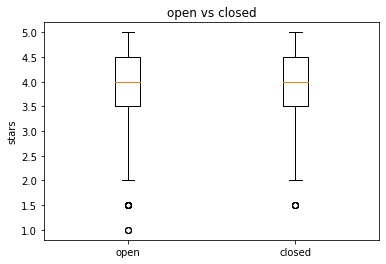

In [4]:
b_open = b[b['is_open'] == 1]['stars']
b_closed = b[b['is_open'] == 0]['stars']
open_or_not = [b_open, b_closed]
labels = ('open', 'closed')
f_open = plt.boxplot(open_or_not)
plt.title('open vs closed')
plt.ylabel('stars')
plt.xticks(np.arange(len(labels))+1,labels)

In [5]:
b.loc[b.NoiseLevel == "u'quiet'", 'NoiseLevel'] = "'quiet'"
b.loc[b.NoiseLevel == "u'average'", 'NoiseLevel'] = "'average'"
b.loc[b.NoiseLevel == "u'loud'", 'NoiseLevel'] = "'loud'"
b.loc[b.NoiseLevel == "u'very_loud'", 'NoiseLevel'] = "'very_loud'"

In [6]:
b.loc[b.Alcohol == "u'beer_and_wine'", 'Alcohol'] = "'beer_and_wine'"
b.loc[b.Alcohol == "u'full_bar'", 'Alcohol'] = "'full_bar'"
b.loc[b.Alcohol == "u'none'" , 'Alcohol'] = "'none'"

In [7]:
b.loc[b.RestaurantsAttire == "u'casual'", 'RestaurantsAttire'] = "'casual'"
b.loc[b.RestaurantsAttire == "u'dressy'", 'RestaurantsAttire'] = "'dressy'"
b.loc[b.RestaurantsAttire == "u'formal'", 'RestaurantsAttire'] = "'formal'"

In [8]:
b.loc[b.WiFi == "u'free'", 'WiFi'] = "'free'"
b.loc[b.WiFi == "u'paid'", 'WiFi'] = "'paid'"
b.loc[b.WiFi == "u'no'", 'WiFi'] = "'no'"

In [9]:
names = ['is_open', 'hours', 'RestaurantsDelivery', 'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2','DogsAllowed','NoiseLevel',
 'RestaurantsTakeOut',
 'Caters',
 'BikeParking',
 'HappyHour',
 'WheelchairAccessible',
 'OutdoorSeating',
 'RestaurantsGoodForGroups',
 'Alcohol',
 'RestaurantsReservations',
 'GoodForKids',
 'HasTV',
 'RestaurantsAttire',
 'DriveThru',
 'WiFi',
 'ByAppointmentOnly',
 'BusinessAcceptsBitcoin',
 'RestaurantsTableService',
 'Corkage',
 'BYOBCorkage',
 'Smoking',
 'CoatCheck',
 'GoodForDancing',
 'BYOB',
 'AcceptsInsurance',
 'Open24Hours',
 'garage',
 'street',
 'validated',
 'lot',
 'valet',
 'BusinessParking',
 'Ambience',
 'touristy',
 'hipster',
 'romantic',
 'divey',
 'intimate',
 'trendy',
 'upscale',
 'classy',
 'casual',
 'Music',
 'dj',
 'background_music',
 'no_music',
 'jukebox',
 'live',
 'video',
 'karaoke',
 'GoodForMeal',
 'dessert',
 'latenight',
 'lunch',
 'dinner',
 'brunch',
 'breakfast',
 'BestNights',
 'monday',
 'tuesday',
 'friday',
 'wednesday',
 'thursday',
 'sunday',
 'saturday',
 'DietaryRestrictions',
 'dairy-free',
 'gluten-free',
 'vegan',
 'kosher',
 'halal',
 'soy-free',
 'vegetarian']

In [10]:
b_v = b[names] #variables used

In [11]:
p.Categorical(b_v['WiFi'])

[NaN, NaN, NaN, NaN, ''free'', ..., ''free'', ''free'', NaN, ''no'', ''free'']
Length: 3427
Categories (4, object): [''free'', ''no'', ''paid'', 'None']

In [12]:
swarm_plot = sns.catplot(...)
fig = swarm_plot.get_figure()
fig.savefig(...) 

C:\Users\80498\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'bool' object has no attribute 'all'

C:\Users\80498\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


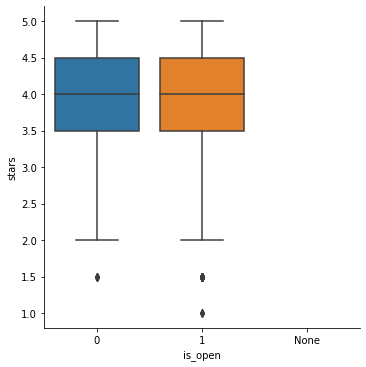

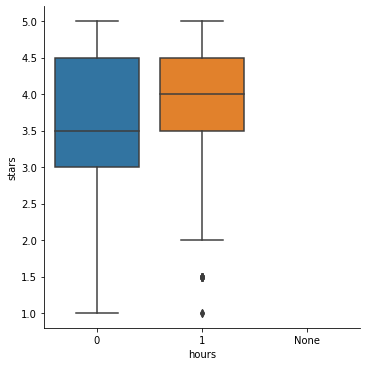

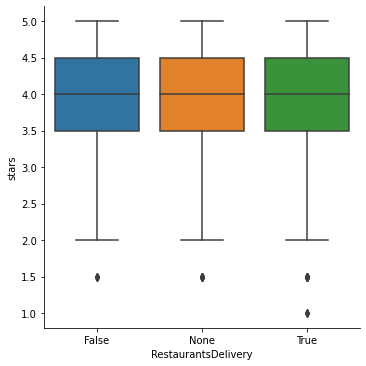

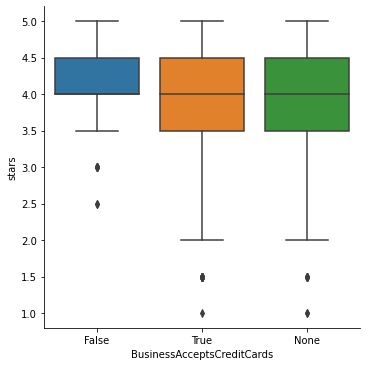

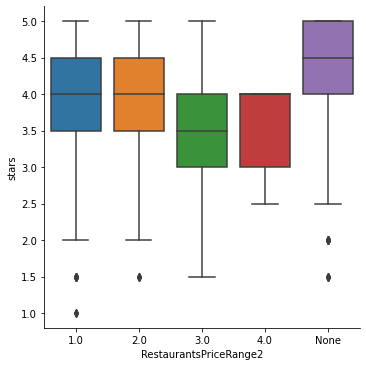

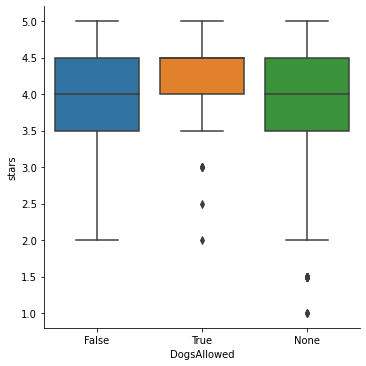

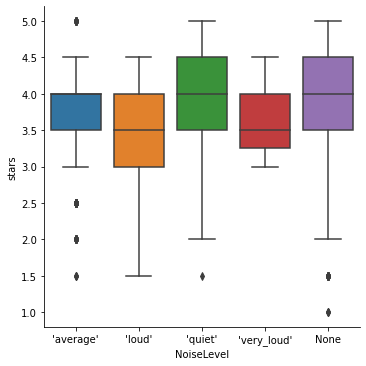

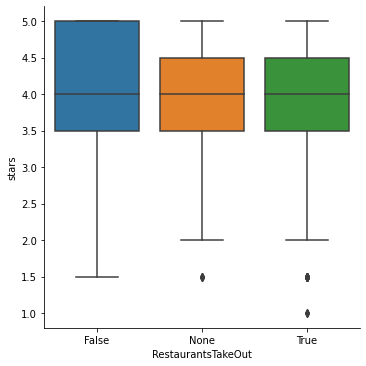

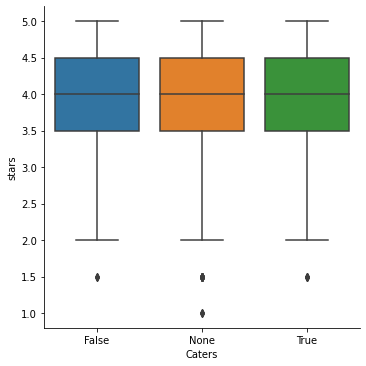

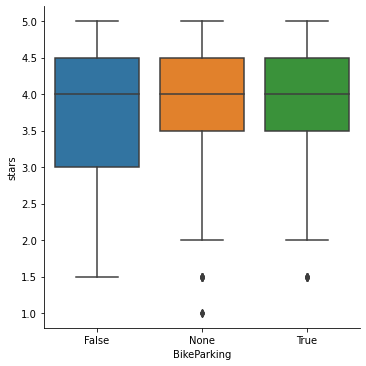

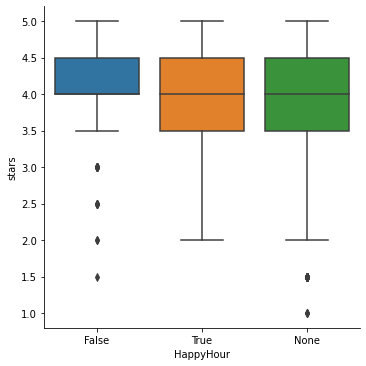

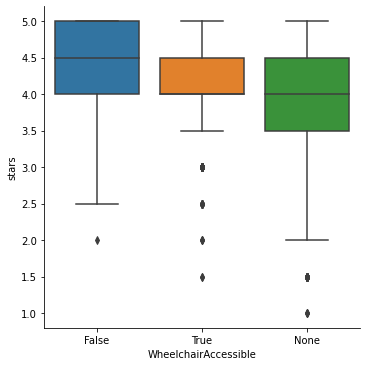

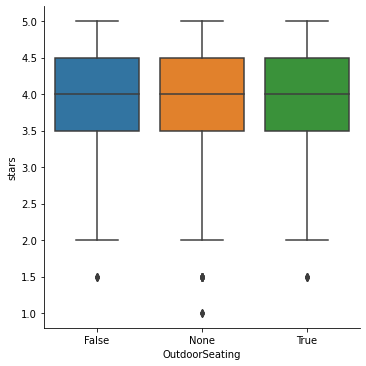

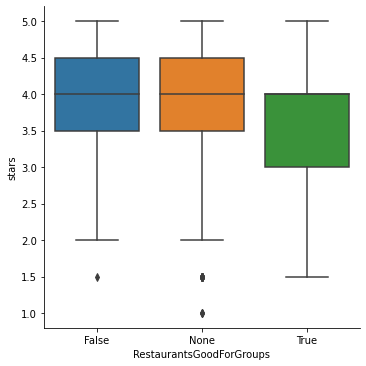

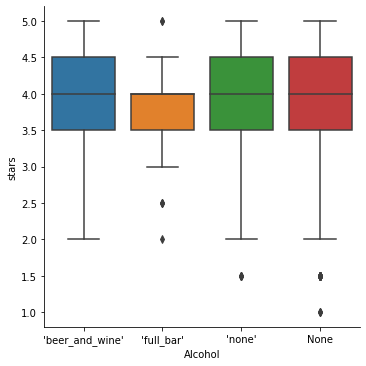

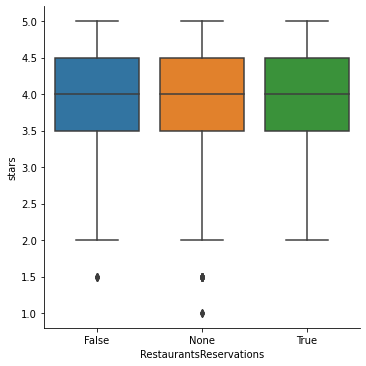

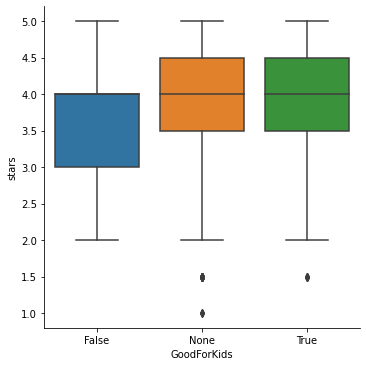

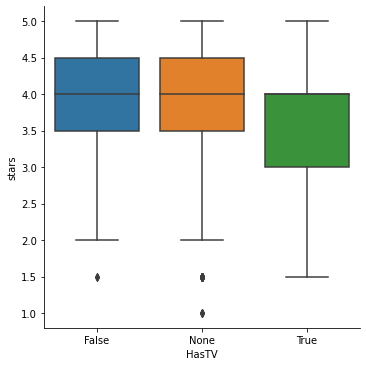

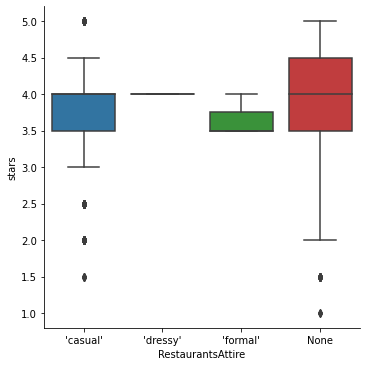

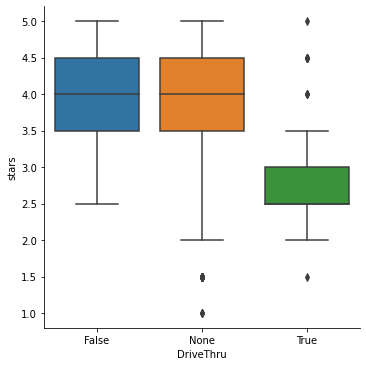

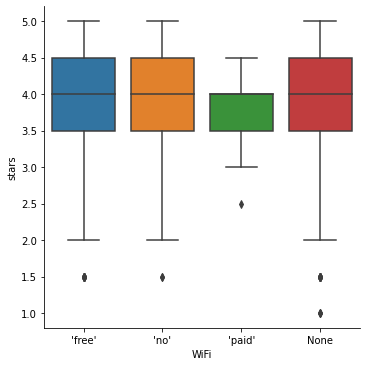

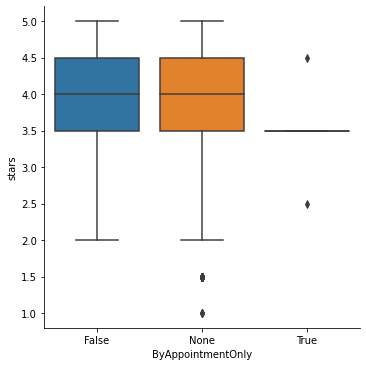

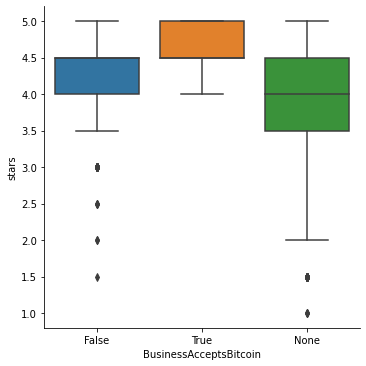

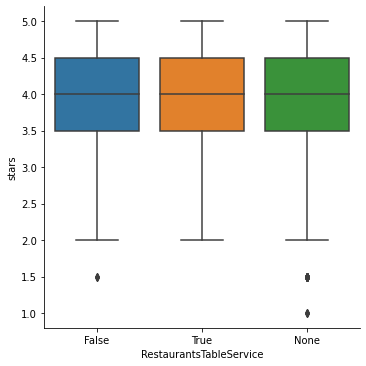

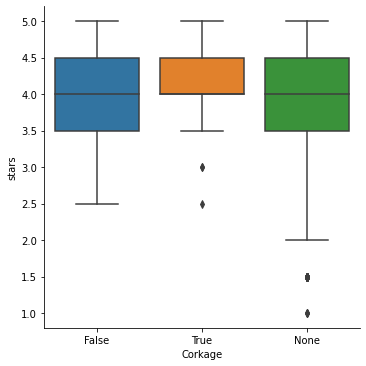

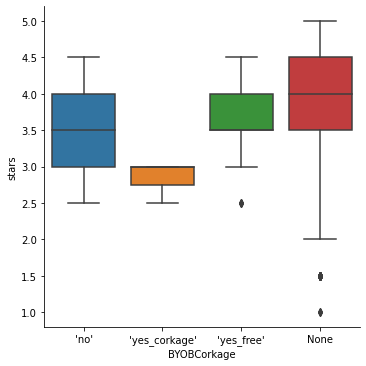

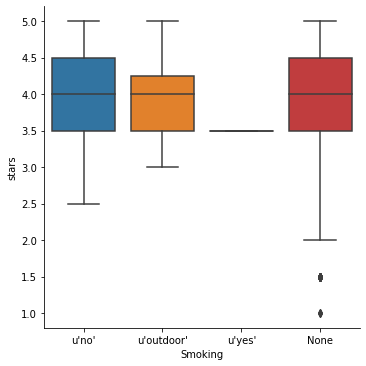

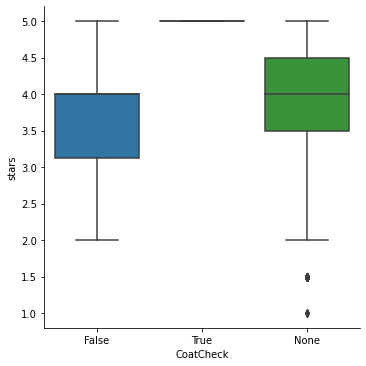

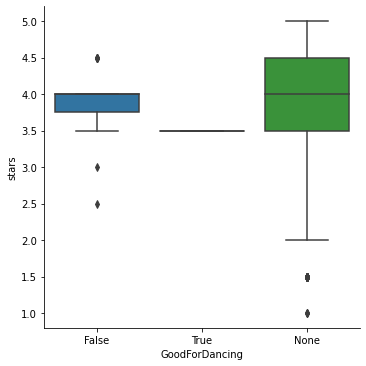

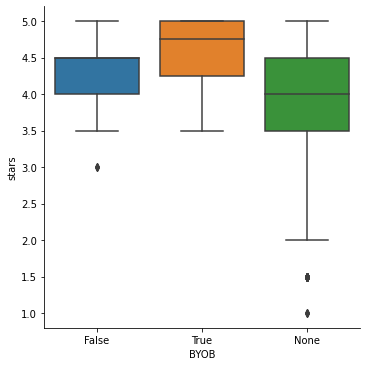

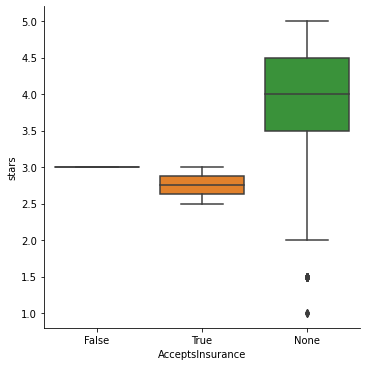

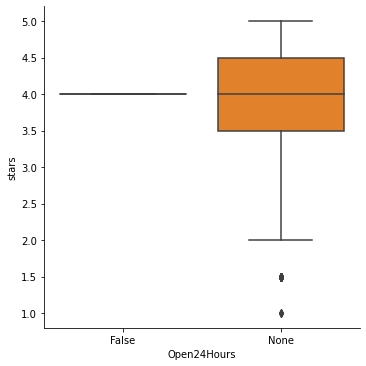

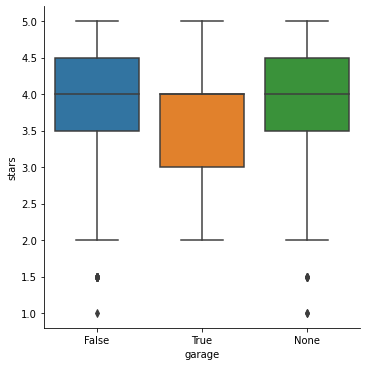

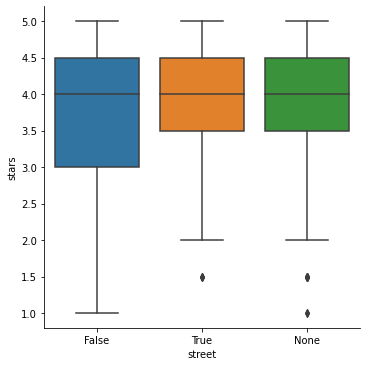

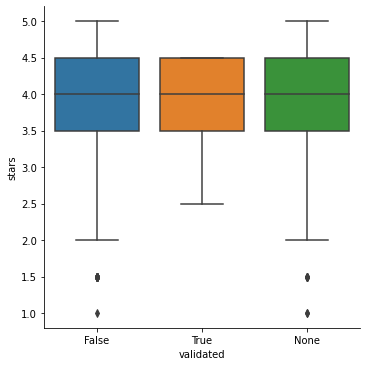

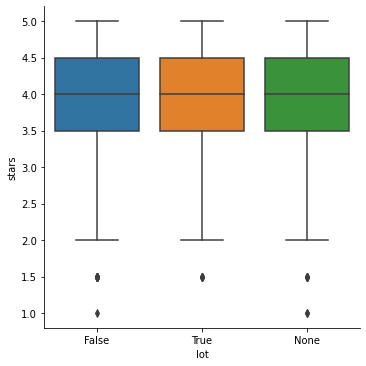

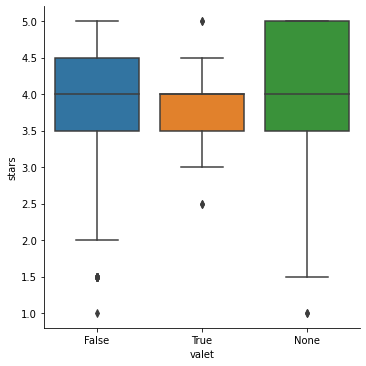

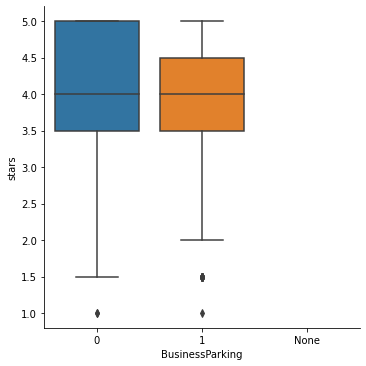

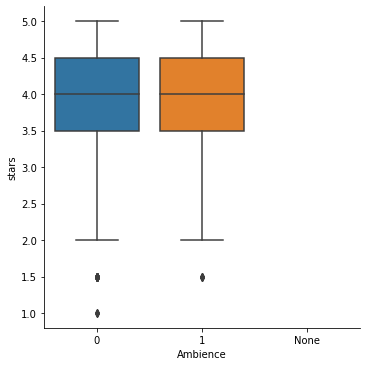

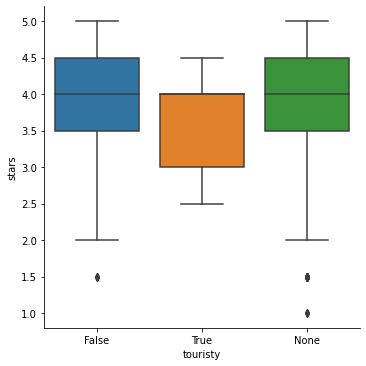

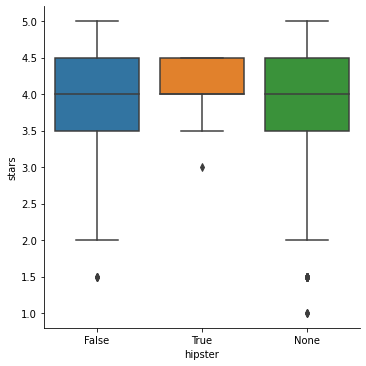

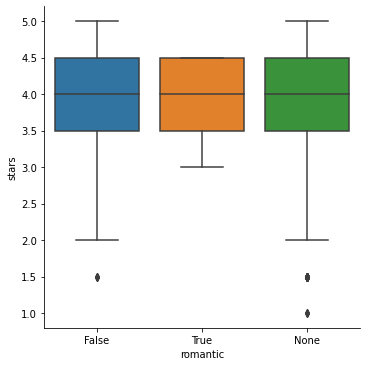

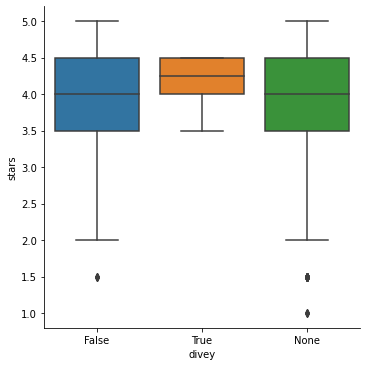

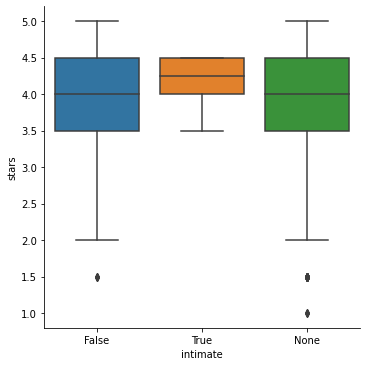

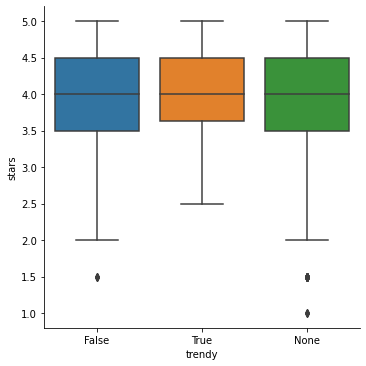

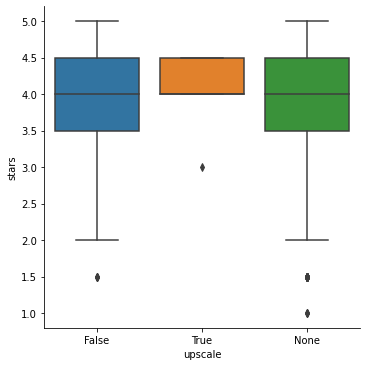

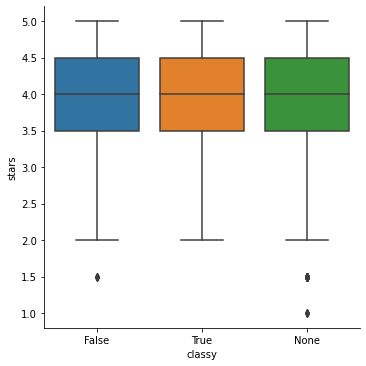

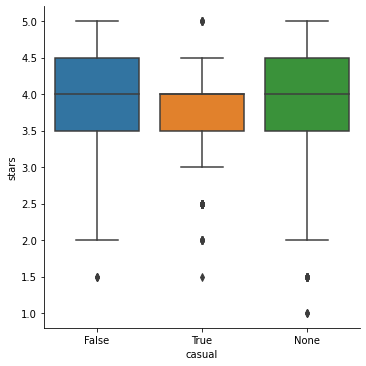

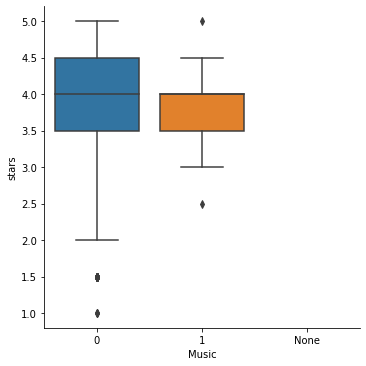

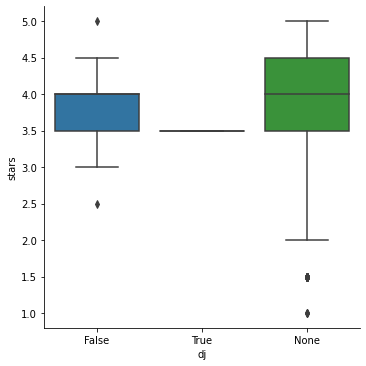

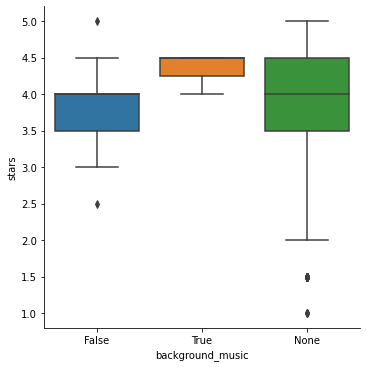

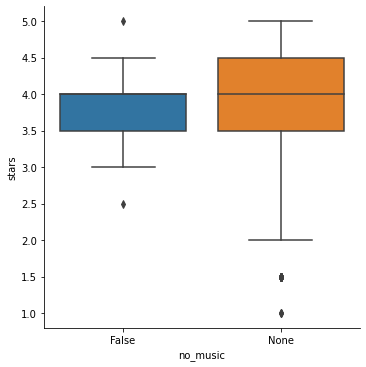

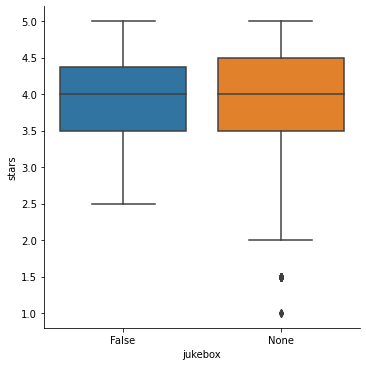

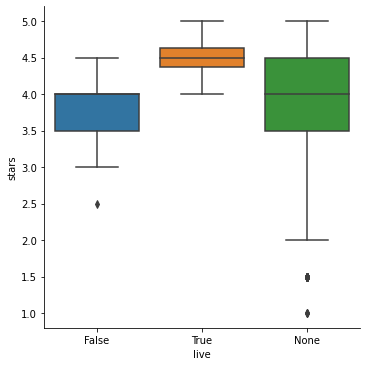

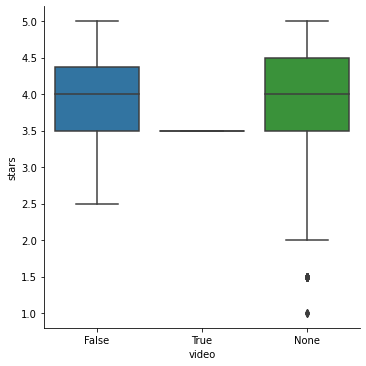

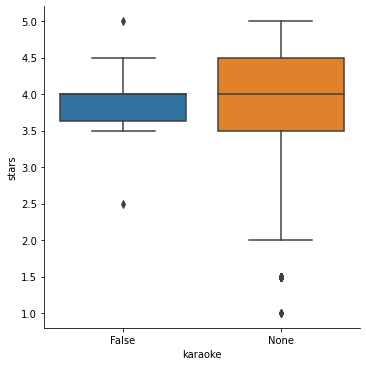

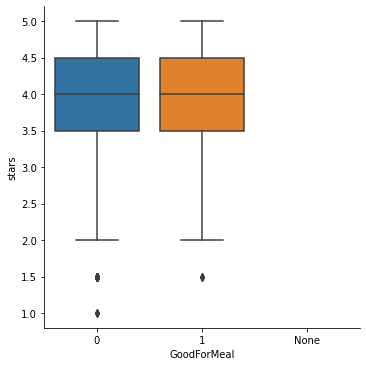

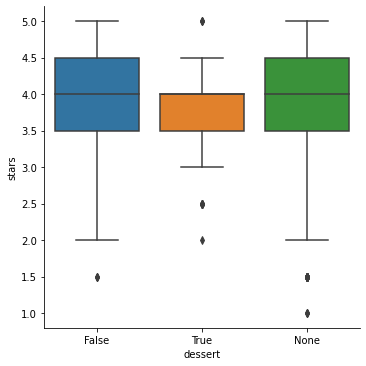

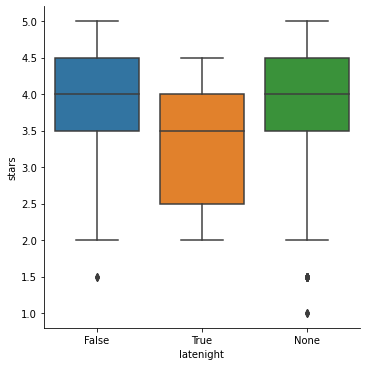

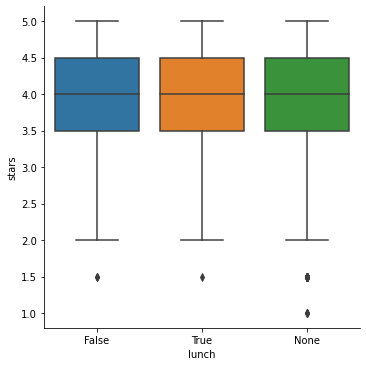

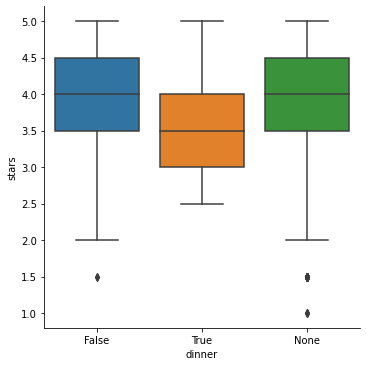

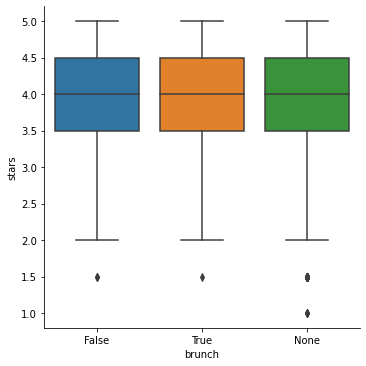

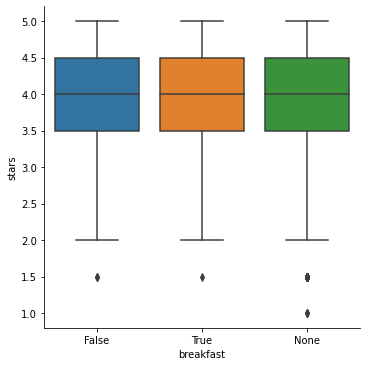

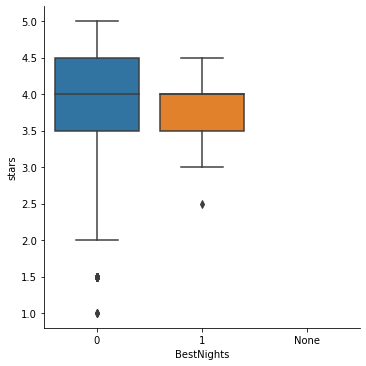

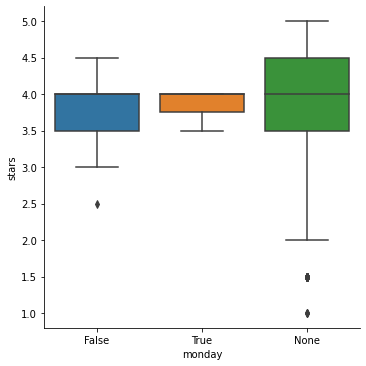

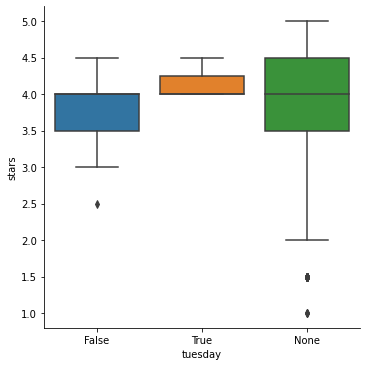

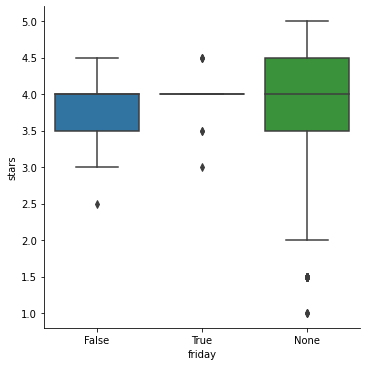

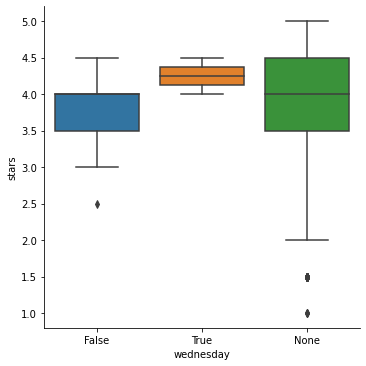

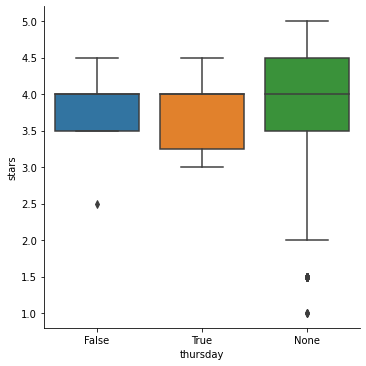

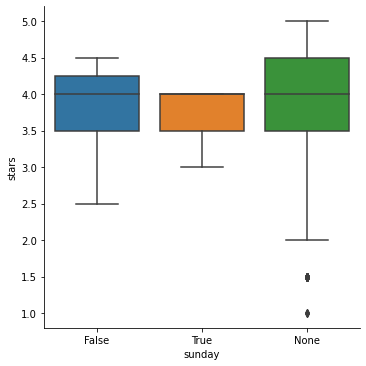

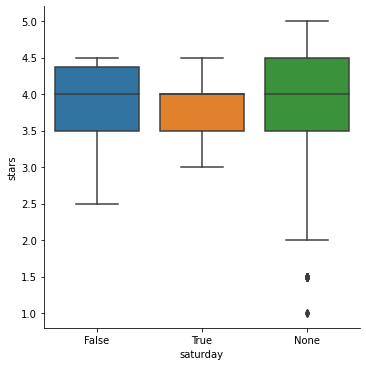

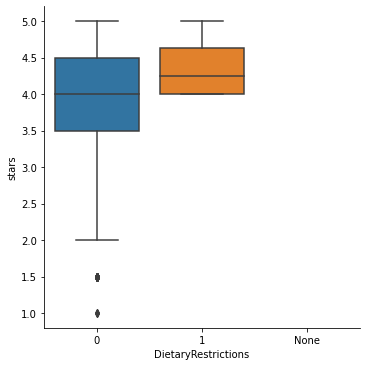

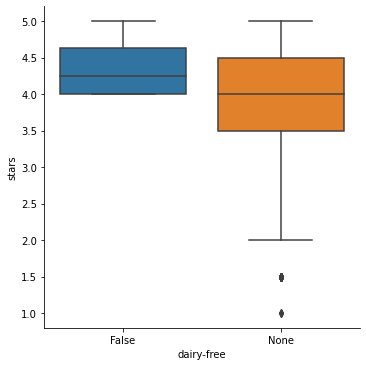

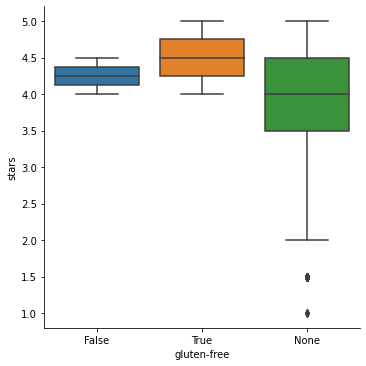

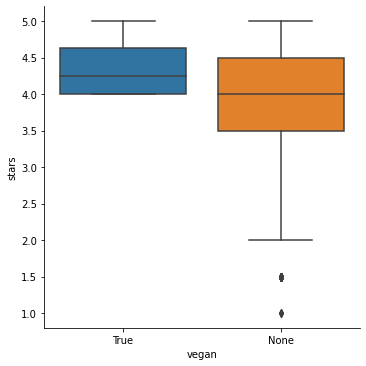

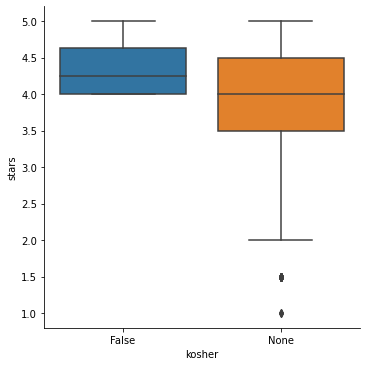

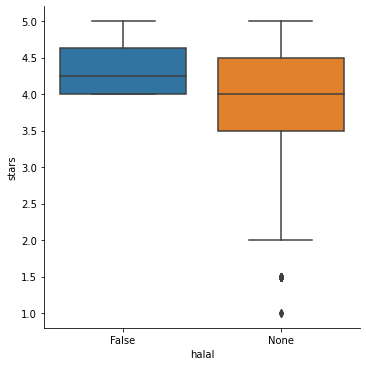

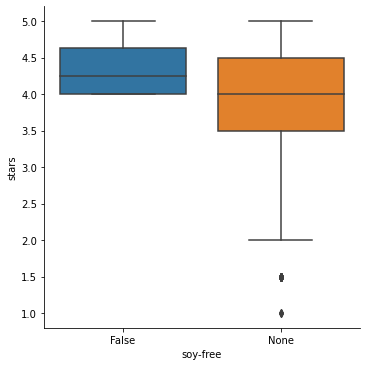

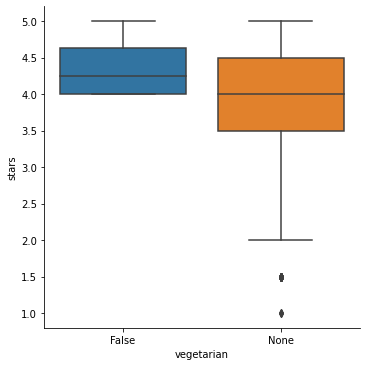

In [13]:
data = p.DataFrame()
data['stars'] = b['stars']
for item in names:
    d = b_v[item]
    d = p.Categorical(d)
    if 'None' in d:
        d = d.fillna('None')
    else:
        d = d.add_categories('None').fillna("None")
    d.replace('none', 'None')
    d.replace("'none'", "None")
    data[item] = d
    #print(item, data.describe())
    sns.catplot(x = item, y='stars', kind="box", data = data).savefig(str(item)+'.png')

In [ ]:
# RestaurantsTakeOut, bikeparking (mean), Byob, Valet (maybe useful)

In [198]:
# some levels has both '...' and u'...'
# NoiseLevel, Alcohol, RestaurantsAttire and WiFi !!!

pandas.core.series.Series

In [54]:
len(data[data['Music'] == 0])+len(data[data['Music'] == 1])


3427

In [132]:
valid_variables = ['stars',  'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'NoiseLevel','RestaurantsGoodForGroups', 'Alcohol','GoodForKids',
 'HasTV',
 'DriveThru',
 'WiFi',
'street',
 'garage',
 'Music', 'BusinessAcceptsBitcoin', 'BYOBCorkage', 'BYOB', 'valet', 'background_music', 'live', 'dinner', 'BestNights']
# review counts > ...

In [133]:
# find variables that has too much missing values
most_missing = []
for item in valid_variables:
    if len(data[data[item] != 'None']) < 700:
        print(item, len(data[data[item] != 'None']))
        most_missing.append(item)

DriveThru 162
BusinessAcceptsBitcoin 462
BYOBCorkage 92
BYOB 105
background_music 34
live 33


In [134]:
len(valid_variables) - len(most_missing)

15

In [135]:
for item in most_missing:
    valid_variables.remove(item)

In [136]:
valid_variables

['stars',
 'BusinessAcceptsCreditCards',
 'RestaurantsPriceRange2',
 'NoiseLevel',
 'RestaurantsGoodForGroups',
 'Alcohol',
 'GoodForKids',
 'HasTV',
 'WiFi',
 'street',
 'garage',
 'Music',
 'valet',
 'dinner',
 'BestNights']

C:\Users\80498\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


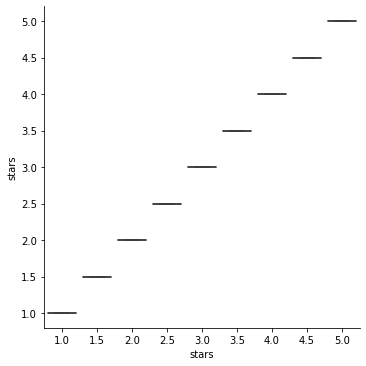

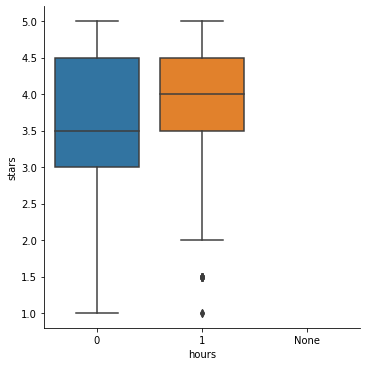

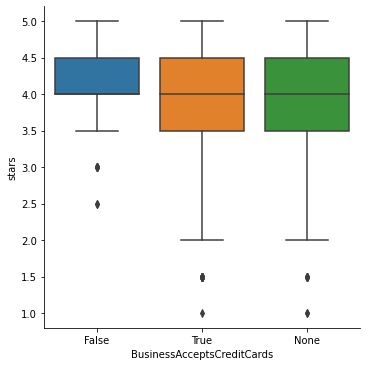

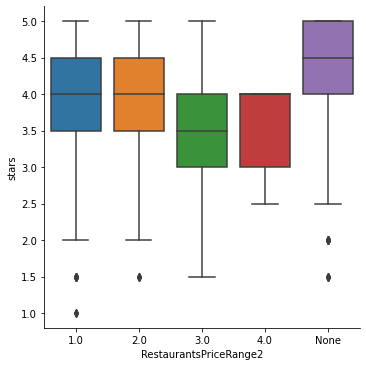

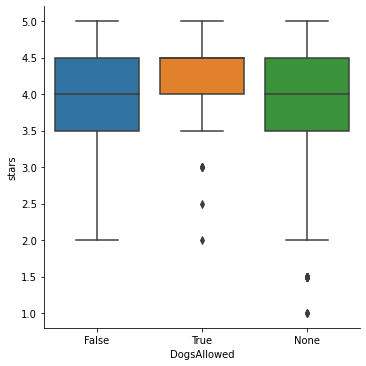

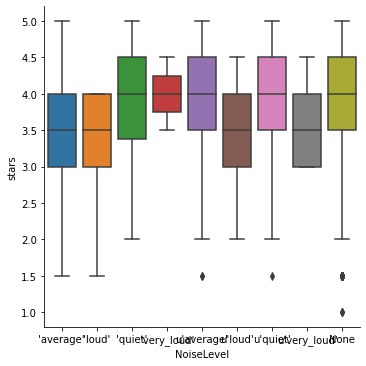

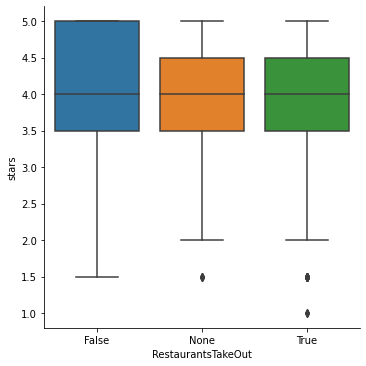

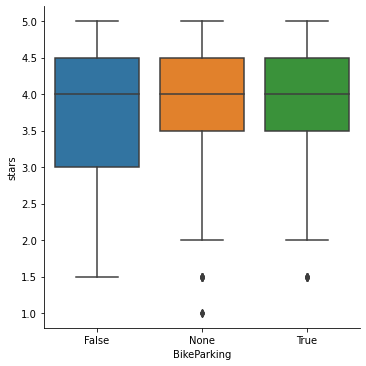

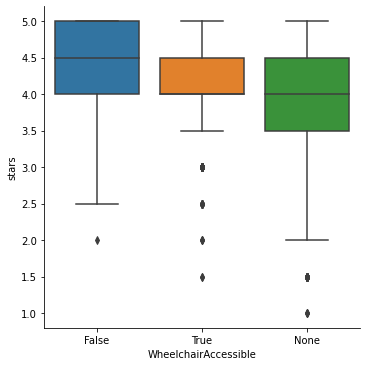

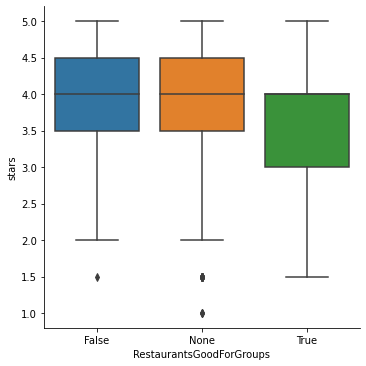

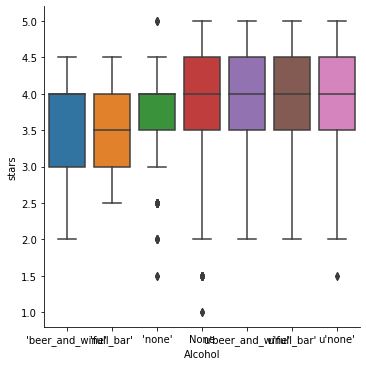

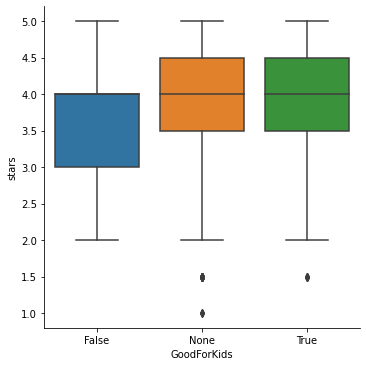

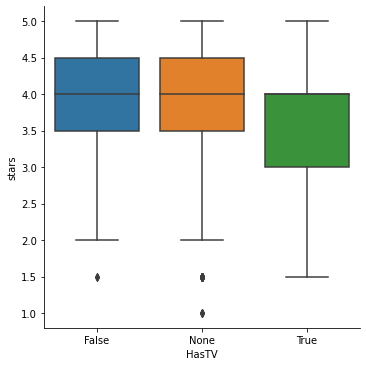

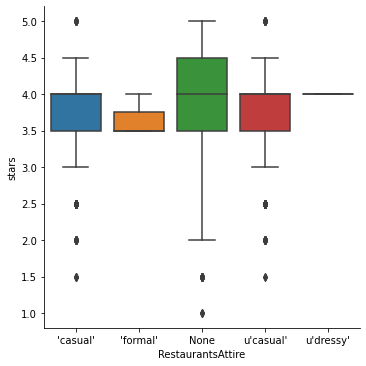

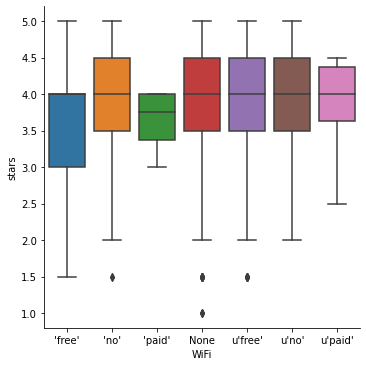

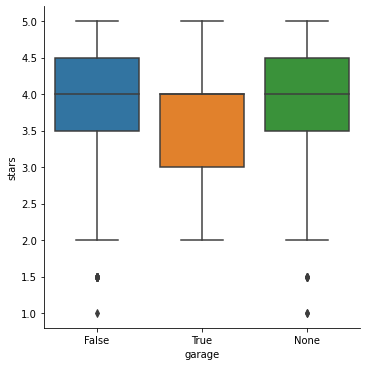

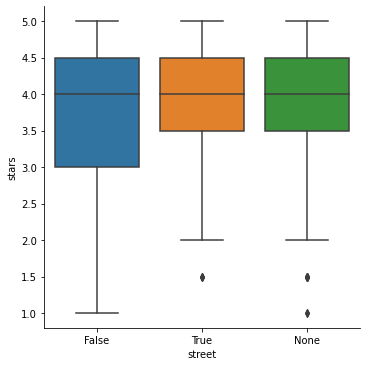

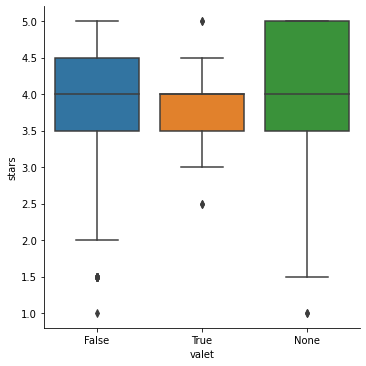

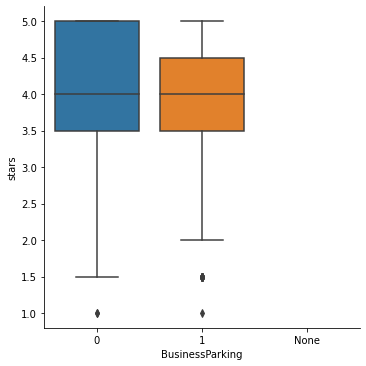

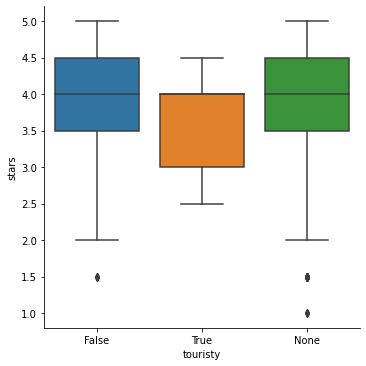

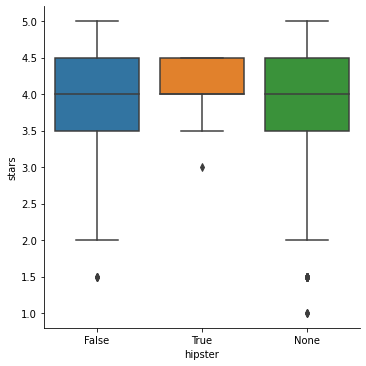

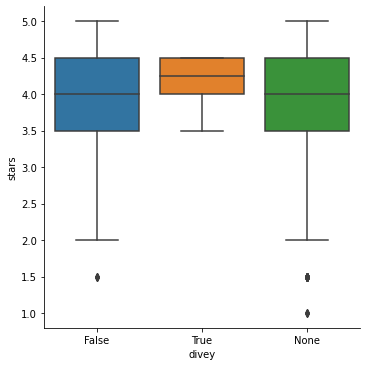

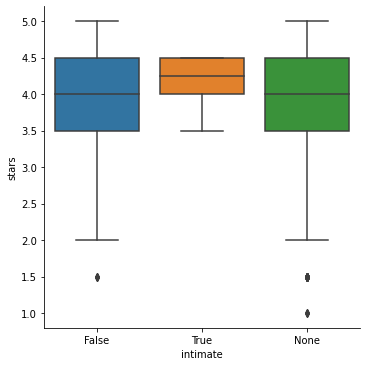

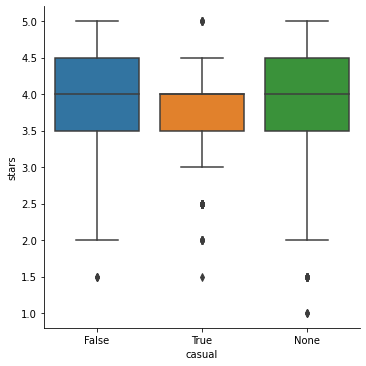

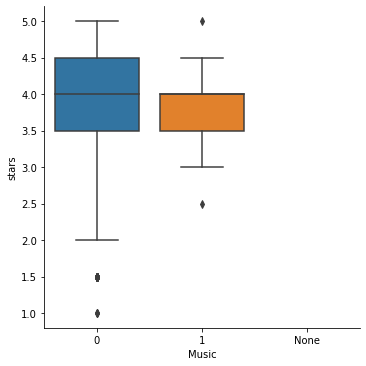

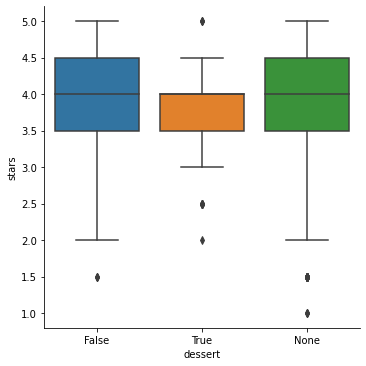

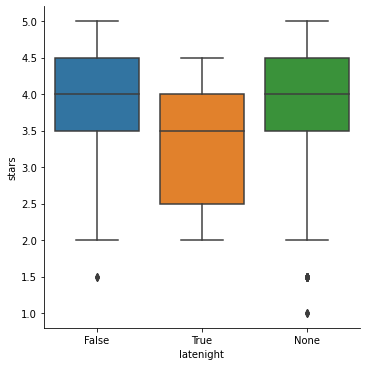

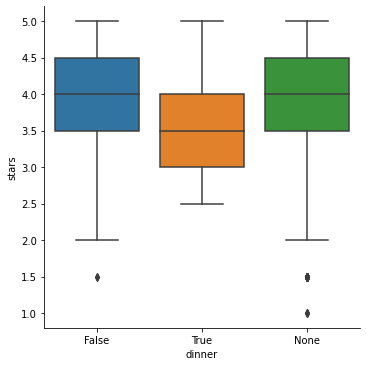

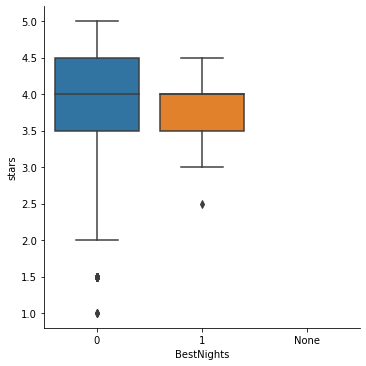

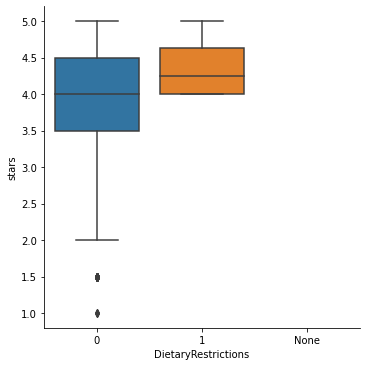

In [170]:
# check plots again
for item in valid_variables:
    #print(item, data.describe())
    sns.catplot(x = item, y='stars', kind="box", data = data)

In [137]:
data = data[valid_variables]
len(data.columns)
data.columns

Index(['stars', 'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2',
       'NoiseLevel', 'RestaurantsGoodForGroups', 'Alcohol', 'GoodForKids',
       'HasTV', 'WiFi', 'street', 'garage', 'Music', 'valet', 'dinner',
       'BestNights'],
      dtype='object')

In [138]:
data.to_csv('selected_data.csv', index = False)